<a href="https://colab.research.google.com/github/sotetsuk/lecture_colab/blob/main/svd_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

X:  [[1.         5.48813504]
 [1.         7.15189366]
 [1.         6.02763376]
 [1.         5.44883183]
 [1.         4.23654799]
 [1.         6.45894113]
 [1.         4.37587211]
 [1.         8.91773001]
 [1.         9.63662761]
 [1.         3.83441519]]
y:  [ 7.90190288 14.52949347 11.97277552  7.10076037 11.33132638 15.48019005
 10.92136731 15.01674534 14.31343616  9.86052624]
Ground Truth: [2.  1.5]
SVD: [2.44430215 1.487387  ]
lstsq: [2.44430215 1.487387  ]


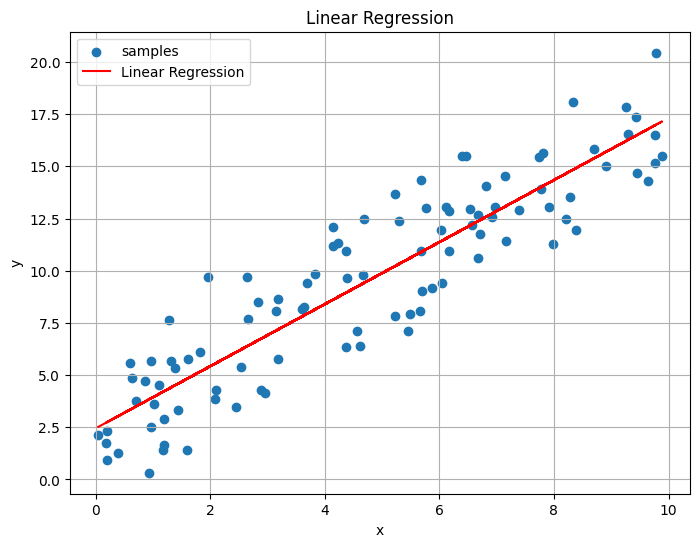

In [14]:
import numpy as np
import matplotlib.pyplot as plt

# データの準備
np.random.seed(0)  # 再現性を確保
n_samples = 100
X = np.random.rand(n_samples, 1) * 10  # 0から10までの乱数
X = np.concatenate((np.ones((n_samples, 1)), X), axis=1)  # 切片項を追加
true_beta = np.array([2, 1.5]) # 真の回帰係数
y = true_beta[0] + true_beta[1] * X[:,1] + np.random.randn(n_samples) * 2 # 正規分布に従うノイズを加える

print("X: ", X[:10])
print("y: ", y[:10])

# 1. SVDを計算
U, s, Vt = np.linalg.svd(X, full_matrices=False)
# 2. 特異値の逆数を計算（小さい特異値は0に）
s_inv = np.array([1/si if si > 1e-12 else 0 for si in s])
# 3. 擬似逆行列 X^+ を構成
X_pinv = Vt.T @ np.diag(s_inv) @ U.T
# 4. 回帰係数ベクトル β を計算
beta_svd = X_pinv @ y

# 参考: numpy.linalg.lstsq で計算した解も一致
beta_lstsq, *_ = np.linalg.lstsq(X, y, rcond=None)
print("Ground Truth:", true_beta)
print("SVD:", beta_svd)
print("lstsq:", beta_lstsq)

# 結果のプロット
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 1], y, label='samples')
plt.plot(X[:, 1], beta_svd[0] + beta_svd[1] * X[:, 1], color='red', label='Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')
plt.legend()
plt.grid(True)
plt.show()